# Region

> This module provides functionality for creating region masks from GeoDataFrames and xarray Datasets. It helps identify points that fall within specified geographic regions.

In [ ]:
#| default_exp region

In [ ]:
#| hide
from nbdev.showdoc import *

/home/i/Documentos/1_Proyectos/ombs_senegal/.venv/lib/python3.12/site-packages/nbdev/doclinks.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources,importlib


In [ ]:
#| export
import xarray as xr
import geopandas as gpd
import regionmask

In [ ]:
roi_gdf = gpd.read_file('../../data/point_ajustement/sub_poly.shp')
sample_region = xr.open_dataset('../../data/bbox_sample.nc')

In [ ]:
#| export
def get_region_mask(ds: xr.Dataset, gdf: gpd.GeoDataFrame) -> xr.DataArray:
    """Create a boolean mask from all geometries in the GeoDataFrame.
    Returns True for points within any geometry, False otherwise."""
    masked_region_with_nan = regionmask.mask_geopandas(gdf, ds)
    mask = ~xr.ufuncs.isnan(masked_region_with_nan)
    return mask

<matplotlib.collections.QuadMesh>

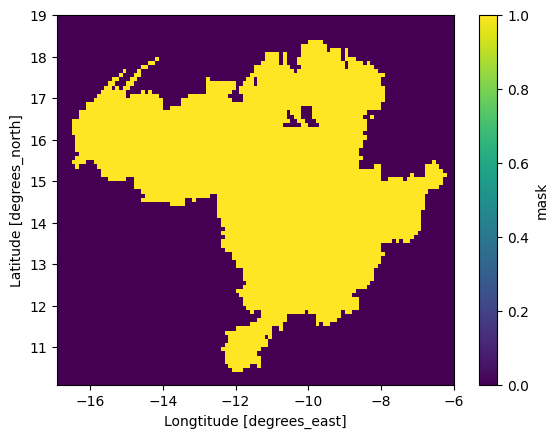

In [ ]:
region_mask = get_region_mask(sample_region, roi_gdf)
region_mask.plot()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()